In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

horse_dataset = pd.read_csv("datacarreras.csv")

horse_dataset.head()

,fecha,numero_carrera,distancia_pista,grupo,nombre_caballo,tiempo,ult_div,penult_div,posicion,cuerpos_ult,cuerpos_penult,distancia_c,lote,jinete_act,jinete_gana,jinete_rep_mon,trainer_act,trainer_gana,resultado
0,08-11-2020,1,1800,2,ironhide,113.0,2100,2300,2,4.25,8.50,2,2,122,16,3,49,5,6
1,08-11-2020,1,1800,2,el ferretero,114.2,10000,10000,7,11.25,13.00,1,3,69,1,1,50,0,3
2,08-11-2020,1,1800,2,matheew star,115.0,350,350,5,6.50,4.25,2,3,43,5,3,93,8,4
3,08-11-2020,1,1800,2,power indy,113.3,450,600,3,6.50,5.50,3,3,99,14,1,146,19,1
4,08-11-2020,1,1800,2,gran giacomo,115.2,540,540,1,0.00,0.50,2,1,92,23,1,31,6,8


In [2]:
# Wins/Starts
horse_dataset['effect_jinete'] = round(horse_dataset["jinete_gana"] / horse_dataset["jinete_act"] * 100, 2)
horse_dataset['effect_trainer'] = round(horse_dataset["trainer_gana"] / horse_dataset["trainer_act"] * 100, 2)

#Filtering and replacing values

#horse_dataset['mej_div'] = horse_dataset['penult_div'] - horse_dataset['ult_div']
horse_dataset = horse_dataset.replace(np.inf, 30)
horse_dataset = horse_dataset[horse_dataset.resultado != 0]
#horse_dataset = horse_dataset[horse_dataset.cuerpos_ult <= 25]
horse_dataset["jinete_rep_mon"].replace(1, 0)
horse_dataset["jinete_rep_mon"].replace(3, 1)
#horse_dataset["cuerpos_ult"].replace(0, horse_dataset["cuerpos_ult"].mean(axis=0), inplace=True)
horse_dataset["distancia_pista"].value_counts()

1200    190
1400    123
1300     59
1600     31
1100     24
1800     19
1900     12
2400     12
Name: distancia_pista, dtype: int64

In [3]:
horse_dataset = horse_dataset[['distancia_pista', 'tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer', 'resultado']]
horse_dataset["ult_div"].replace(0, horse_dataset["ult_div"].mean(axis=0), inplace=True)
horse_dataset

,distancia_pista,tiempo,ult_div,posicion,cuerpos_ult,distancia_c,lote,jinete_gana,effect_jinete,jinete_rep_mon,trainer_gana,effect_trainer,resultado
0,1800,113.0,2100.0,2,4.25,2,2,16,13.11,3,5,10.20,6
1,1800,114.2,10000.0,7,11.25,1,3,1,1.45,1,0,0.00,3
2,1800,115.0,350.0,5,6.50,2,3,5,11.63,3,8,8.60,4
3,1800,113.3,450.0,3,6.50,3,3,14,14.14,1,19,13.01,1
4,1800,115.2,540.0,1,0.00,2,1,23,25.00,1,6,19.35,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,1200,77.1,3000.0,11,16.00,1,3,2,4.55,1,0,0.00,8
492,1200,77.2,700.0,13,19.00,1,3,17,14.17,1,24,14.04,11
493,1200,76.2,800.0,8,17.00,1,3,27,19.42,1,23,17.83,1
494,1200,76.2,10000.0,9,15.00,1,3,2,2.33,1,4,11.43,13


In [ ]:
#horse_dataset["resultado"].replace(7, 6, inplace=True)
#horse_dataset["resultado"].replace(8, 6, inplace=True)
#horse_dataset["resultado"].replace(9, 6, inplace=True)
#horse_dataset["resultado"].replace(10, 6, inplace=True)
#horse_dataset["resultado"].replace(11, 6, inplace=True)
#horse_dataset["resultado"].replace(12, 6, inplace=True)
#horse_dataset["resultado"].replace(13, 6, inplace=True)
#horse_dataset["resultado"].replace(14, 6, inplace=True)
#horse_dataset

In [4]:
from sklearn.model_selection import train_test_split

carreras_1200 = horse_dataset.loc[horse_dataset['distancia_pista'] <= 1200]
carreras_1200_gana = carreras_1200.loc[horse_dataset['resultado'] <= 5]
carreras_1300_plus = horse_dataset.loc[horse_dataset['distancia_pista'] >=1300]
carreras_1300_plus_gana = carreras_1300_plus.loc[horse_dataset['resultado'] <= 5]
horse_dataset = horse_dataset.loc[horse_dataset["resultado"] <= 10]

carreras_1200_train, carreras_1200_test = train_test_split(carreras_1200_gana, test_size = 0.2, random_state=42)
carreras_1300_train, carreras_1300_test = train_test_split(carreras_1300_plus_gana, test_size = 0.2, random_state=42)
horse_dataset_train, horse_dataset_test = train_test_split(horse_dataset, test_size = 0.2, random_state=42)

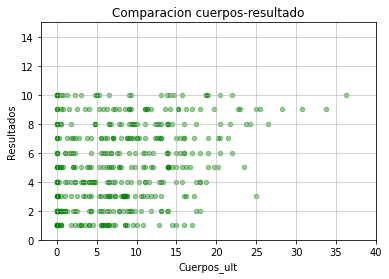

In [5]:
%matplotlib inline
#horse_plot = horse_dataset.plot(kind="scatter", x="cuerpos_ult", y='resultado', alpha=0.3)
plt.scatter(horse_dataset["cuerpos_ult"],horse_dataset["resultado"], alpha=0.4, c="green", s=20)
plt.title("Comparacion cuerpos-resultado")
plt.xlabel("Cuerpos_ult")
plt.ylabel("Resultados")
plt.ylim(0,15)
plt.xlim(-2, 40)
plt.grid(alpha=0.7)
#horse_plot.set_ylim(0, 15)
#horse_plot.set_xlim(-1, 40)

In [6]:
horse_corr_matrix_1300_plus = carreras_1300_plus_gana.corr()
horse_corr_matrix_1300_plus['resultado'].sort_values(ascending=True)

lote              -0.246450
jinete_gana       -0.108616
distancia_c       -0.075633
effect_jinete     -0.071222
effect_trainer    -0.001070
distancia_pista    0.015350
tiempo             0.033477
trainer_gana       0.067435
jinete_rep_mon     0.121922
cuerpos_ult        0.126862
ult_div            0.147640
posicion           0.178900
resultado          1.000000
Name: resultado, dtype: float64

In [7]:
horse_corr_matrix_1200 = carreras_1200_gana.corr()
horse_corr_matrix_1200['resultado'].sort_values(ascending=True)

effect_jinete     -0.146936
jinete_gana       -0.127109
jinete_rep_mon    -0.097073
trainer_gana      -0.042156
effect_trainer    -0.035728
lote              -0.032913
distancia_pista    0.000000
distancia_c        0.038736
ult_div            0.061433
tiempo             0.099173
posicion           0.162495
cuerpos_ult        0.308572
resultado          1.000000
Name: resultado, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

attribs = ['resultado', 'tiempo', 'lote', 'cuerpos_ult', "distancia_c"]
scatter_matrix(horse_dataset[attribs], figsize=(12,8))

In [8]:
horse_dataset_r = horse_dataset_train["resultado"].copy()
carreras_1200_r = carreras_1200_train["resultado"].copy()
carreras_1300_plus_r = carreras_1300_train["resultado"].copy()

horse_dataset_train.drop("resultado", axis=1)
carreras_1200_train.drop("resultado", axis=1)
carreras_1300_train.drop("resultado", axis=1)

,distancia_pista,tiempo,ult_div,posicion,cuerpos_ult,distancia_c,lote,jinete_gana,effect_jinete,jinete_rep_mon,trainer_gana,effect_trainer
31,1800,112.3,700.000000,1,0.00,2,1,14,14.14,3,16,18.18
39,1300,79.3,400.000000,9,15.75,3,2,23,25.00,1,24,15.09
469,1600,99.4,2600.000000,3,6.75,3,2,7,6.31,3,4,14.81
317,1300,82.2,260.000000,4,3.00,2,3,19,12.93,1,2,3.28
416,1400,88.0,2896.729787,7,8.25,1,3,2,5.71,1,2,6.25
...,...,...,...,...,...,...,...,...,...,...,...,...
448,1400,88.1,220.000000,2,0.50,3,3,13,22.41,1,22,14.67
34,1800,113.4,900.000000,7,13.00,2,3,38,25.85,1,22,21.36
380,1300,81.0,2000.000000,2,7.25,2,3,6,9.38,1,6,4.88
210,1600,99.3,500.000000,2,4.50,1,1,24,20.34,1,20,17.54


In [9]:
horse_dataset_prepared = horse_dataset_train[['tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer']]
carreras_1200_prepared = carreras_1200_train[['tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer']]
carreras_1300_prepared = carreras_1300_train[['tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer']]

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef

X_1200, y_1200 = carreras_1200_prepared, carreras_1200_r
X_1300, y_1300 = carreras_1300_prepared, carreras_1300_plus_r
X_total, y_total = horse_dataset_prepared, horse_dataset_r

transform_data = Pipeline([
    ("scaler", StandardScaler())
])

#Linear Support Vector Classifier 
svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("svm_clf_short", LinearSVC(C=50, loss="hinge", max_iter=20000, dual=True))
])

#Support Vector Machine Classifier with polynomial kernel
svm_clf_pk = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf_long", SVC(kernel="poly", degree=7, coef0=5, C=20, probability=True))
])

#Paramaters for grid search SVM_PK
param_grid_svm_pk = [
    {'kernel':['poly'],'degree': [2, 3, 4, 5, 7], 'coef0': [1, 3, 5, 7], "C": [0.5, 2, 10, 20, 50, 100]}
]

grid_search_svm_pk = GridSearchCV(SVC(), param_grid_svm_pk, cv=5, return_train_score=True, scoring="accuracy")

#Support Vector Machine Classifier with Gaussian RBF kernel
svm_clf_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf_gauss", SVC(kernel="rbf", gamma=6, C=10))
])

#Random Forest Classifier
rf_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("rforest", RandomForestClassifier(n_estimators=500, bootstrap=False))
])

#RandomForest Grid search
param_grid_rf = [
    {'n_estimators': [300, 500, 800], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [5, 10, 15]}
]

grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, return_train_score=True, scoring="accuracy")

#Softmax Regression Classifier
softmax_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("softmax_r", LogisticRegression(multi_class="multinomial", solver="lbfgs", C=5))
])

#Softmax Grid search
param_grid_softmax = [
    {'C': [0.5, 1, 10, 20, 50, 100], 'solver': ['lbfgs', 'saga', 'newton-cg'], 'max_iter': [200, 500, 1000]}
]

grid_search_softmax = GridSearchCV(softmax_reg, param_grid_softmax, cv=5, return_train_score=True, scoring="accuracy")

In [16]:
#transform_data.fit_transform(X_1300)
#grid_search_svm_pk.fit(X_1300, y_1300)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 2, 10, 20, 50, 100], 'coef0': [1, 3, 5, 7],
                          'degree': [2, 3, 4, 5, 7], 'kernel': ['poly']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
#grid_search_rf.fit(X_1300, y_1300)

In [ ]:
#grid_search_softmax.fit(X_1300, y_1300)

In [22]:
print("SVM_PK best parameters: " + str(grid_search_svm_pk.best_params_))
#print(f"RandomForest best parameters: {grid_search_rf.best_params_}"
#print(f"Softmax best parameters: {grid_search_softmax.best_params_}"

SVM_PK best parameters: {'C': 20, 'coef0': 5, 'degree': 7, 'kernel': 'poly'}


In [27]:
from sklearn.metrics import mean_squared_error

y_test_1200 = carreras_1200_test["resultado"].copy()
y_test_1300 = carreras_1300_test["resultado"].copy()
y_test_total = horse_dataset_test["resultado"].copy()

X_test_1200 = carreras_1200_test[['tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer']]
X_test_1300 = carreras_1300_test[['tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer']]
X_test_total = horse_dataset_test[['tiempo', 'ult_div', 'posicion','cuerpos_ult', 'distancia_c', 'lote', 'jinete_gana', 'effect_jinete', 'jinete_rep_mon', 'trainer_gana','effect_trainer']]

X_test_1200_prepared = transform_data.fit_transform(X_test_1200)
X_test_1300_prepared = transform_data.fit_transform(X_test_1300)
X_test_total_prepared = transform_data.fit_transform(X_test_total)

In [28]:
svm_clf_pk.fit(X_1300, y_1300)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf_long',
                 SVC(C=20, coef0=5, degree=7, kernel='poly',
                     probability=True))])

In [31]:
from sklearn.model_selection import cross_val_score

y_pred_svm = cross_val_score(svm_clf_pk, X_1300, y_1300, scoring="accuracy", cv=5)

y_pred_1300 = svm_clf_pk.predict(X_test_1300)

svm_clf_pk_matthew = matthews_corrcoef(y_pred_1300, y_test_1300)

def display_scores(scores, matthew):
    print("Accuracy: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
    print(f"Matthew's coef: {matthew}")
    
display_scores(y_pred_svm, svm_clf_pk_matthew)

Accuracy:  [0.05       0.15789474 0.21052632 0.15789474 0.10526316]
Mean:  0.1363157894736842
Standard Deviation:  0.05450355143578787
Matthew's coef: -0.06024640760767093


In [ ]:
prediction_test = svm_clf_pk.predict(X_test_1300_prepared)

prediction_mse = mean_squared_error(y_test_1300, prediction_test)
prediction_rmse = np.sqrt(prediction_mse)

In [ ]:
print(f"Prediction MSE: {prediction_mse}")
print(f"Prediction RMSE: {prediction_rmse}")

In [34]:
some_data = X_test_1300.iloc[10:20]
some_labels = y_test_1300.iloc[10:20]

In [35]:
#print(f"Probab: {svm_clf_pk.predict_proba(some_data)}")
print(f"Predictions: {svm_clf_pk.predict(some_data)}")
print(f"Labels: {list(some_labels)}")

y_pred, y_true = svm_clf_pk.predict(some_data), some_labels

print(f"Matthew coef: {matthews_corrcoef(y_true, y_pred)}")

Predictions: [2 2 1 1 2 1 3 2 1 1]
Labels: [4, 4, 1, 4, 1, 1, 2, 3, 4, 3]
Matthew coef: -0.015694120514358614


In [ ]:
rf_clf.fit(X_1300, y_1300)

In [ ]:
y_pred_rf = cross_val_score(rf_clf, X_1300, y_1300, scoring="accuracy", cv=5)

y_pred_1300 = rf_clf.predict(X_test_1300)

rf_clf_matthew = matthews_corrcoef(y_pred_1300, y_test_1300)

display_scores(y_pred_rf, rf_clf_matthew)

In [ ]:
prediction_test = rf_clf.predict(X_test_1300_prepared)

prediction_mse = mean_squared_error(y_test_1300, prediction_test)
prediction_rmse = np.sqrt(prediction_mse)

print(f"Prediction MSE: {prediction_mse}")
print(f"Prediction RMSE: {prediction_rmse}")

In [ ]:
print(f"Predictions: {rf_clf.predict(some_data)}")
print(f"Labels: {list(some_labels)}")

In [ ]:
softmax_reg.fit(X_1300, y_1300)

y_pred_softmax = cross_val_score(softmax_reg, X_1300, y_1300, scoring="accuracy", cv=5)

y_pred_1300 = softmax_reg.predict(X_test_1300)

softmax_clf_matthew = matthews_corrcoef(y_pred_1300, y_test_1300)

display_scores(y_pred_softmax, softmax_clf_matthew)

In [ ]:
prediction_test = softmax_reg.predict(X_test_1300_prepared)

prediction_mse = mean_squared_error(y_test_1300, prediction_test)
prediction_rmse = np.sqrt(prediction_mse)

print(f"Prediction MSE: {prediction_mse}")
print(f"Prediction RMSE: {prediction_rmse}")

In [ ]:
print(f"Percentages: {softmax_reg.predict_proba(some_data)}")
print(f"Predictions: {softmax_reg.predict(some_data)}")
print(f"Labels: {list(some_labels)}")